In [143]:
from shared import *
purchases_df = get_wearable_purchases_df()
wearable_types_df = get_wearable_types_df()
purchases_types_df = get_wearables_purchases_types_df(wearable_types_df, purchases_df)
market_cap_df = get_wearables_market_cap_df(wearable_types_df, purchases_df)

### Wearables Market Cap

In [162]:
column_name_mappings = {'name': 'Wearable', 'price': 'Median Price (GHST)', 'rarity': 'Rarity', 'slotNames': 'Slot(s)', 'datePurchased': 'Date', 'startOfWeekPurchased': 'Week', 'yearMonthPurchased': 'Month', 'lastPrice': 'Last Sale Price (GHST)', 'marketCap': 'Market Cap (GHST)', 'maxQuantity': 'Total Supply'}

def get_market_cap_by_column(column_name):
    return market_cap_df.pivot_table(index=column_name,values=['marketCap'],aggfunc=np.sum,margins=False).reset_index().rename(columns=column_name_mappings)
total_market_cap_df = pd.DataFrame([market_cap_df['marketCap'].sum()], columns=["Market Cap (GHST)"])
cap_by_name_df = market_cap_df.pivot_table(index='name',values=['lastPrice', 'maxQuantity', 'marketCap'],aggfunc=np.sum,margins=False).reset_index().rename(columns=column_name_mappings)
cap_by_slot_df = get_market_cap_by_column('slotNames')
cap_by_rarity_df = get_market_cap_by_column('rarity')

show_itable(total_market_cap_df)

Market Cap (GHST)
Loading... (need help?)


### Market Cap by Wearable

In [163]:
# need to reorder columns due to pandas pivot values column sorting issue: https://github.com/pandas-dev/pandas/issues/17041
show_itable_long(cap_by_name_df[[column_name_mappings['name'],column_name_mappings['lastPrice'],column_name_mappings['maxQuantity'],column_name_mappings['marketCap']]], order=[[3, 'desc']])

### Market Cap by Slot

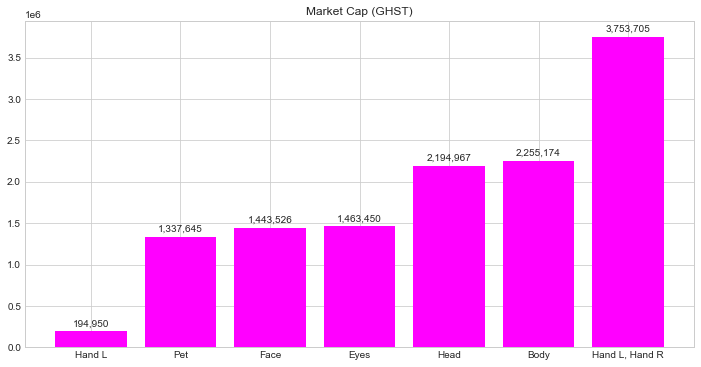

In [164]:
get_bar_charts(cap_by_slot_df.sort_values(column_name_mappings['marketCap']), column_name_mappings['slotNames'], [column_name_mappings['marketCap']], [GHST_COLOR])

### Market Cap by Rarity

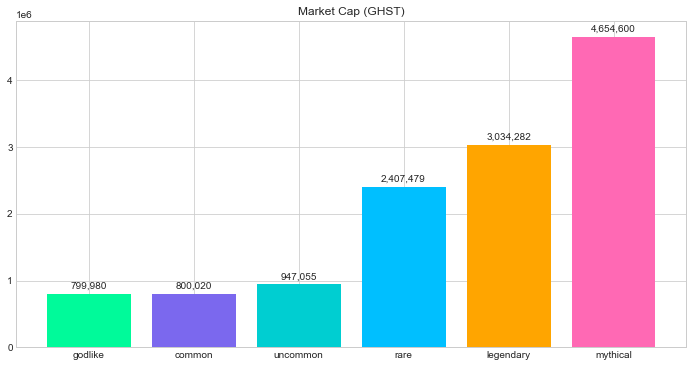

In [165]:
sorted_cap_by_rarity_df = cap_by_rarity_df.sort_values(column_name_mappings['marketCap'])
rarity_colors = list(map(get_rarity_color, sorted_cap_by_rarity_df[column_name_mappings['rarity']].to_list()))
get_bar_charts(sorted_cap_by_rarity_df, column_name_mappings['rarity'], [column_name_mappings['marketCap']], [rarity_colors])

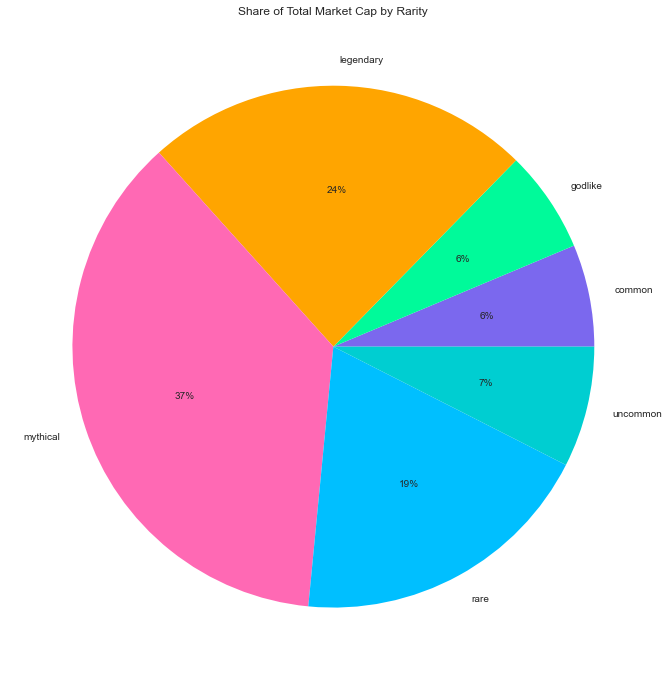

In [166]:
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.set_title('Share of Total Market Cap by Rarity')
ax.pie(cap_by_rarity_df[column_name_mappings['marketCap']], labels=cap_by_rarity_df[column_name_mappings['rarity']], autopct='%.0f%%', colors=list(map(get_rarity_color, cap_by_rarity_df[column_name_mappings['rarity']].tolist()))
)
pass